https://github.com/zeyanglyu/DD2360HT22

In [ ]:
!nvidia-smi
!nvcc --version 

Fri Dec 16 14:40:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EX1

### Compile

In [ ]:
! nvcc -arch=sm_75 /content/drive/MyDrive/lab3_ex1.cu -o lab3_ex1

###Run

In [ ]:
!./lab3_ex1 1024

The input length is 1024
sum verified: Correct!
Time Host->Device: 0.000031 - Time Device->Host: 0.000033
CPU time: 0.000004 - GPU time: 0.000028


In [ ]:
!./lab3_ex1 131070

The input length is 131070
sum verified: Correct!
Time Host->Device: 0.000657 - Time Device->Host: 0.000757
CPU time: 0.001073 - GPU time: 0.000028


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex1 1024

The input length is 1024
==PROF== Connected to process 349 (/content/lab3_ex1)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
sum verified: Correct!
Time Host->Device: 0.000106 - Time Device->Host: 0.000048
CPU time: 0.000005 - GPU time: 0.830987
==PROF== Disconnected from process 349
[349] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-15 19:00:40, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.81
    SM Frequency                                                             cycle/usecond                         565.35
    Elapsed Cycles                                                                   cycle                          2,226
    Memory [%]                                                        

In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex1 131070

The input length is 131070
==PROF== Connected to process 380 (/content/lab3_ex1)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
sum verified: Correct!
Time Host->Device: 0.000689 - Time Device->Host: 0.000867
CPU time: 0.000914 - GPU time: 0.695896
==PROF== Disconnected from process 380
[380] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-15 19:01:11, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.91
    SM Frequency                                                             cycle/usecond                         573.05
    Elapsed Cycles                                                                   cycle                          6,512
    Memory [%]                                                      

## Questions


####2.For a vector length of N:

###### (1) How many floating operations are being performed in your vector add kernel?
<br/>
N 

###### (2) How many global memory reads are being performed by your kernel? 
<br/> 
2N

####3.For a vector length of 1024:

###### (1) Explain how many CUDA threads and thread blocks you used.
<br/> 
128 CUDA threads and 8block

###### (2) Profile your program with Nvidia Nsight. What Achieved Occupancy did you get?
<br/> 
12.13%

#### 4.For a vector length of 131070:

###### (1) Did your program still work? If not, what changes did you make?
<br/> 
Yes, it works

###### (2) Explain how many CUDA threads and thread blocks you used.
<br/> 
threads per block :128  
blocks :1024

###### (3) Profile your program with Nvidia Nsight. What Achieved Occupancy do you get now?
<br/> 

78.03%
  
##### 5.Further increase the vector length (try 6-10 different vector length), plot a stacked bar chart showing the breakdown of time including (1) data copy from host to device (2) the CUDA kernel (3) data copy from device to host. For this, you will need to add simple CPU timers to your code regions.


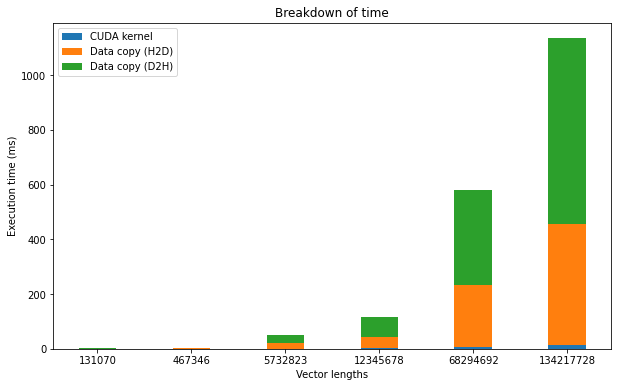

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vector_lengths = ['131070', '467346', '5732823', '12345678', '68294692', '134217728']
datacpy_h2d = np.array([0.655, 1.705, 19.182, 42.215, 225.947, 445.338])
datacpy_d2h = np.array([0.779, 2.493, 30.252, 72.900, 346.645, 677.716])
cuda_kernel = np.array([0.028, 0.088, 0.559, 1.143, 6.246, 12.331])

width = 0.4
plt.figure(figsize =(10, 6))

plt.bar(vector_lengths, cuda_kernel, width, label='CUDA kernel')
plt.bar(vector_lengths, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H2D)')
plt.bar(vector_lengths, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D2H)')

plt.xlabel('Vector lengths')
plt.ylabel('Execution time (ms)')
plt.title('Breakdown of time')
plt.legend()

plt.show()

# EX2

### Compile

In [ ]:
!nvcc /content/drive/MyDrive/lab3_ex2.cu -o lab3_ex2

### Run

In [ ]:
!./lab3_ex2 128 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
Host to Device Time: 0.000093
CUDA Kernel Time: 0.000147
Device to Host Time: 0.000127
Results are equal.


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex2 128 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
==PROF== Connected to process 444 (/content/lab3_ex2)
Host to Device Time: 0.000116
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
CUDA Kernel Time: 0.656891
Device to Host Time: 0.000140
Results are equal.
==PROF== Disconnected from process 444
[444] lab3_ex2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-16 01:41:35, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.99
    SM Frequency                                                             cycle/usecond                         584.81
    Elapsed Cycles                                                                   cycle                         71,435
    Memory [%]                                

In [ ]:
!./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
Host to Device Time: 0.007887
CUDA Kernel Time: 0.048108
Device to Host Time: 0.010410
Results are equal.


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==PROF== Connected to process 349 (/content/lab3_ex2)
Host to Device Time: 0.007832
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
CUDA Kernel Time: 1.172642
Device to Host Time: 0.010650
Results are equal.
==PROF== Disconnected from process 349
[349] lab3_ex2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2022-Dec-16 01:36:29, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         584.98
    Elapsed Cycles                                                                   cycle                     28,105,962
    Memory [%]                            

### Questions
##### 1.Name three applications domains of matrix multiplication.
<br/> 

Machine Learning, Computer Graphics, Robotics

##### 2.How many floating operations are being performed in your matrix multiply kernel? 
<br/> 
2 * numARows * numBColumns * numAColumns 
  
##### 3.How many global memory reads are being performed by your kernel?
<br/> 
3 * numARows * numBColumns * numAColumns

##### 4.For a matrix A of (128x128) and B of (128x128):
###### (1) Explain how many CUDA threads and thread blocks you used.
<br/> 
32 thread per block X, 32 thread per block Y, 4 blocks X, 4 blocks Y

###### (2) Profile your program with Nvidia Nsight. What Achieved Occupancy did you get?
<br/> 
96.31%

##### 5.For a matrix A of (511x1023) and B of (1023x4094):  
<br/> 
###### (1) Did your program still work? If not, what changes did you make?
<br/> 
Yes

###### (2) Explain how many CUDA threads and thread blocks you used.
<br/> 
32 thread per block X, 32 thread per block Y, 128 blocks X, 16 blocks Y

###### (3) Profile your program with Nvidia Nsight. What Achieved Occupancy do you get now?
<br/> 
 98.57%
  
#####6.Further increase the size of matrix A and B, plot a stacked bar chart showing the breakdown of time including (1) data copy from host to device (2) the CUDA kernel (3) data copy from device to host. For this, you will need to add simple CPU timers to your code regions. Explain what you observe.
  
CUDA takes the most of time during the execution with the increasing of matrix size and Device to Host takes more time than Host to Device.

In [ ]:
!./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
Host to Device Time: 0.008185
CUDA Kernel Time: 0.048118
Device to Host Time: 0.010838
Results are equal.


In [ ]:
!./lab3_ex2 512 1024 1024 4096

Input matrix dim (512 x 1024) (1024 x 4096) (512 x 4096)
Host to Device Time: 0.008030
CUDA Kernel Time: 0.048325
Device to Host Time: 0.010827
Results are equal.


In [ ]:
!./lab3_ex2 768 1024 1024 4096

Input matrix dim (768 x 1024) (1024 x 4096) (768 x 4096)
Host to Device Time: 0.008762
CUDA Kernel Time: 0.071625
Device to Host Time: 0.016413
Results are equal.


In [ ]:
!./lab3_ex2 1024 1024 1024 4096

Input matrix dim (1024 x 1024) (1024 x 4096) (1024 x 4096)
Host to Device Time: 0.009408
CUDA Kernel Time: 0.095655
Device to Host Time: 0.026338
Results are equal.


In [ ]:
!./lab3_ex2 1536 1024 1024 4096

Input matrix dim (1536 x 1024) (1024 x 4096) (1536 x 4096)
Host to Device Time: 0.010097
CUDA Kernel Time: 0.134480
Device to Host Time: 0.032755
Results are equal.


In [ ]:
!./lab3_ex2 1536 1536 1536 4096

Input matrix dim (1536 x 1536) (1536 x 4096) (1536 x 4096)
Host to Device Time: 0.015604
CUDA Kernel Time: 0.184170
Device to Host Time: 0.035177
Results are equal.


In [ ]:
!./lab3_ex2 2048 2048 2048 4096

Input matrix dim (2048 x 2048) (2048 x 4096) (2048 x 4096)
Host to Device Time: 0.023318
CUDA Kernel Time: 0.307939
Device to Host Time: 0.044084
Results are equal.


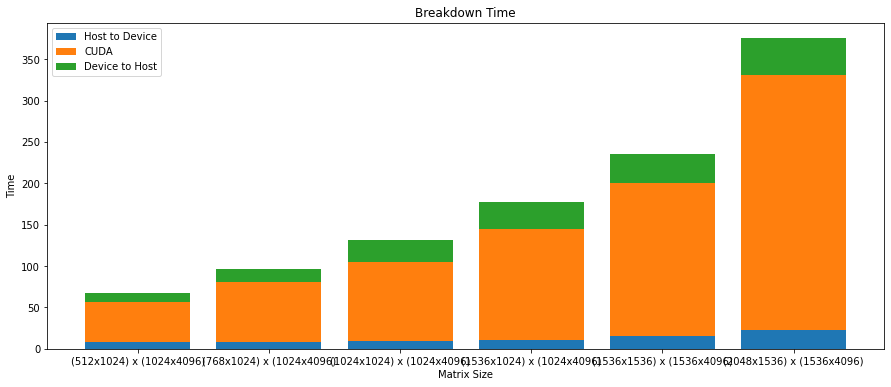

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(768x1024) x (1024x4096)', '(1024x1024) x (1024x4096)',
                '(1536x1024) x (1024x4096)', '(1536x1536) x (1536x4096)', '(2048x1536) x (1536x4096)']
cuda_kernel = np.array([48.118, 71.625, 95.655, 134.480, 184.170, 307.939])
datacpy_d2h = np.array([10.838, 16.413, 26.338, 32.755, 35.177, 44.084])
datacpy_h2d = np.array([8.185, 8.762, 9.408, 10.097, 15.604, 23.318])

plt.figure(figsize=(15, 6))
plt.bar(matrix_sizes, datacpy_h2d, label='Host to Device')
plt.bar(matrix_sizes, cuda_kernel, bottom=datacpy_h2d, label='CUDA')
plt.bar(matrix_sizes, datacpy_d2h, bottom=cuda_kernel + datacpy_h2d, label='Device to Host')
plt.title('Breakdown Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.legend()
plt.show()
     

###### 7.Now, change DataType from double to float, re-plot the a stacked bar chart showing the time breakdown. Explain what you observe. 
 

In [ ]:
!nvcc /content/drive/MyDrive/lab3_ex2_float.cu -o lab3_ex2_float

In [ ]:
!./lab3_ex2_float 512 1024 1024 4096

Input matrix dim (512 x 1024) (1024 x 4096) (512 x 4096)
CPU Time: 28.463904
Host to Device Time: 0.004184
CUDA Kernel Time: 0.013507
Device to Host Time: 0.005952
Results are equal.


In [ ]:
!./lab3_ex2_float 768 1024 1024 4096

Input matrix dim (768 x 1024) (1024 x 4096) (768 x 4096)
CPU Time: 37.914191
Host to Device Time: 0.004753
CUDA Kernel Time: 0.020047
Device to Host Time: 0.010049
Results are equal.


In [ ]:
!./lab3_ex2_float 1024 1024 1024 4096

Input matrix dim (1024 x 1024) (1024 x 4096) (1024 x 4096)
CPU Time: 51.439631
Host to Device Time: 0.004565
CUDA Kernel Time: 0.026724
Device to Host Time: 0.011516
Results are equal.


In [ ]:
!./lab3_ex2_float 1536 1024 1024 4096

Input matrix dim (1536 x 1024) (1024 x 4096) (1536 x 4096)
CPU Time: 76.811406
Host to Device Time: 0.005169
CUDA Kernel Time: 0.039953
Device to Host Time: 0.018003
Results are equal.


In [ ]:
!./lab3_ex2_float 1536 1536 1536 4096

Input matrix dim (1536 x 1536) (1536 x 4096) (1536 x 4096)
CPU Time: 120.423336
Host to Device Time: 0.007727
CUDA Kernel Time: 0.059737
Device to Host Time: 0.018236
Results are equal.


In [ ]:
!./lab3_ex2_float 2048 2048 2048 4096

Input matrix dim (2048 x 2048) (2048 x 4096) (2048 x 4096)
CPU Time: 331.076652
Host to Device Time: 0.011621
CUDA Kernel Time: 0.105853
Device to Host Time: 0.022692
Results are equal.


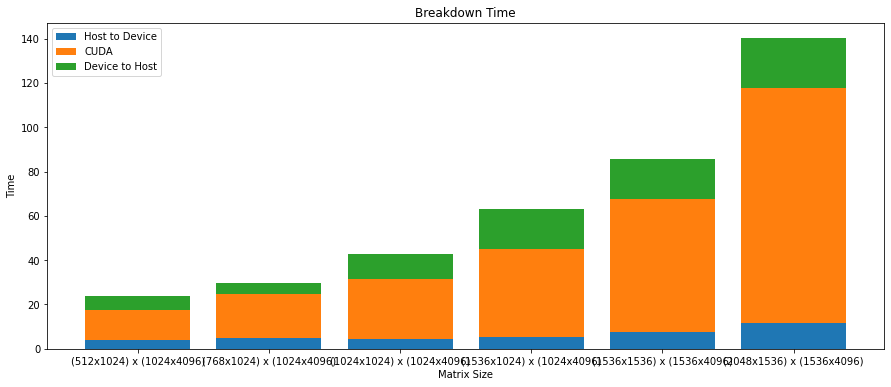

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(768x1024) x (1024x4096)', '(1024x1024) x (1024x4096)',
                '(1536x1024) x (1024x4096)', '(1536x1536) x (1536x4096)', '(2048x1536) x (1536x4096)']
cuda_kernel = np.array([13.507, 20.047, 26.724, 39.953, 59.737, 105.853])
datacpy_d2h = np.array([5.952, 4.753, 11.516, 18.003, 18.236, 22.692])
datacpy_h2d = np.array([4.184, 4.753, 4.565, 5.169, 7.727, 11.621])

plt.figure(figsize=(15, 6))
plt.bar(matrix_sizes, datacpy_h2d, label='Host to Device')
plt.bar(matrix_sizes, cuda_kernel, bottom=datacpy_h2d, label='CUDA')
plt.bar(matrix_sizes, datacpy_d2h, bottom=cuda_kernel + datacpy_h2d, label='Device to Host')
plt.title('Breakdown Time')
plt.xlabel('Matrix Size')
plt.ylabel('Time')
plt.legend()
plt.show()

It uses less time while changing DataType to float because float is half size of double.

# EX3

### Questions
##### 1.Describe all optimizations you tried regardless of whether you committed to them or abandoned them and whether they improved or hurt performance.
<br/> 
  I use atomic to write directly. I use atomicAdd to avoid race condition.
##### 2.Which optimizations you chose in the end and why? 
<br/> 
I choose global memory since the input data is not too large.
##### 3.How many global memory reads are being performed by your kernel? Explain
<br/> 
histogram_kernel: 2 * numElements , because the add function is excecuted.

convert_kernel: numBins , it need iterate through bins.
  

##### 4.How many atomic operations are being performed by your kernel? Explain
<br/> 

##### 5.How much shared memory is used in your code? Explain
<br/> 
histogram_kernel: numElements

convert_kernel: none
##### 6.How would the value distribution of the input array affect the contention among threads? For instance, what contentions would you expect if every element in the array has the same value? 
<br/> 
If all elements has the same value, we can get max contention.


In [ ]:
!nvcc /content/drive/MyDrive/lab3_ex3.cu -o lab3_ex3

In [ ]:
!./lab3_ex3 131072

The input length is 131072


In [ ]:
!nvprof ./lab3_ex3 131072

The input length is 131072
==959== NVPROF is profiling process 959, command: ./lab3_ex3 131072
==959== Profiling application: ./lab3_ex3 131072
==959== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   52.02%  46.048us         1  46.048us  46.048us  46.048us  [CUDA memcpy HtoD]
                   23.28%  20.608us         1  20.608us  20.608us  20.608us  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int)
                   15.26%  13.504us         1  13.504us  13.504us  13.504us  convert_kernel(unsigned int*, unsigned int)
                    5.82%  5.1520us         1  5.1520us  5.1520us  5.1520us  [CUDA memset]
                    3.62%  3.2000us         1  3.2000us  3.2000us  3.2000us  [CUDA memcpy DtoH]
      API calls:   99.48%  207.86ms         2  103.93ms  3.3070us  207.85ms  cudaMalloc
                    0.17%  365.53us         1  365.53us  365.53us  365.53us  cuDeviceTotalMem
          

##### 7.Plot a histogram generated by your code and specify your input length, thread block and grid.
<br/> 

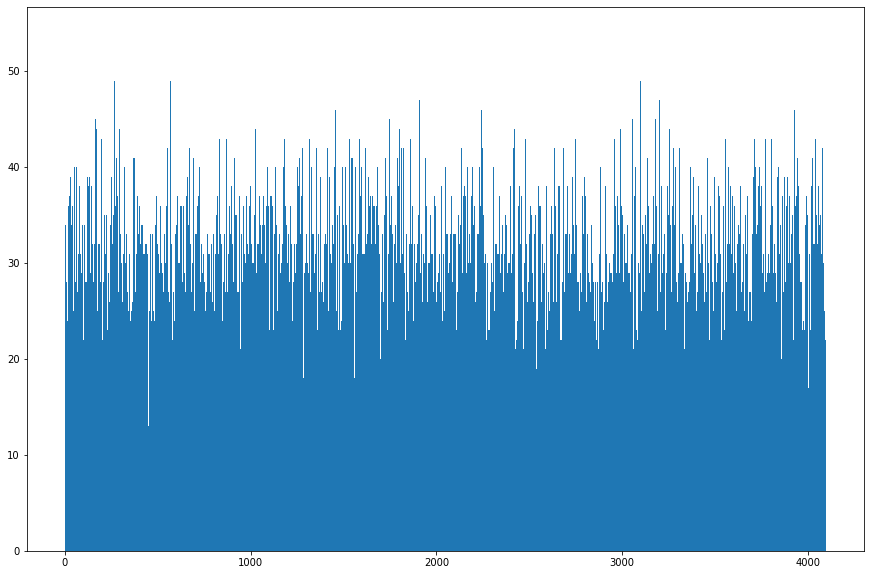

In [ ]:
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/histogram.txt') as f:
    histogram = [int(line.rstrip()) for line in f]

plt.figure(figsize=(15, 10))
bins = list(range(1,len(histogram)+1))
plt.bar(bins, histogram, width=1.0)
plt.show()
     

In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex3 1024

The input length is 1024
==PROF== Connected to process 996 (/content/lab3_ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 996
[996] lab3_ex3@127.0.0.1
  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int), 2022-Dec-16 15:19:04, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.75
    SM Frequency                                                             cycle/usecond                         557.12
    Elapsed Cycles                                                                   cycle                          2,176
    Memory [%]                                                             

##### 8.For a input array of 1024 elements, profile with Nvidia Nsight and report Shared Memory Configuration Size and Achieved Occupancy. Did Nvsight report any potential performance issues?
<br/> 
Shared Memory Configuration Size: 32.77 Kbytes

Achieved Occupancy: 3.12%

Yes, it says the grid is too small and can underutilize some multiprocessors.

# EX4

### Questions
##### 1.Describe the environment you used, what changes you made to the Makefile, and how you ran the simulation.
<br/> 
Environment: Google Colab


Changes in Makefile :change ARCH=sm_30 to ARCH=sm_75

##### 2.Describe your design of the GPU implementation of mover_PC() briefly.
 First allocate device memory, copy from host memory to device memory and initialize thread block and kernel grid dimensions, then Invoke CUDA kernel,copy results from GPU to CPU and free device memory.

##### 3.Compare the output of both CPU and GPU implementation to guarantee that your GPU implementations produce correct answers.

In [ ]:
%cd '/content/drive/MyDrive/sputniPIC-DD2360-changed'
!ls

/content/drive/MyDrive/sputniPIC-DD2360
include  inputfiles  Makefile  src


In [ ]:
!make all

mkdir -p ./bin
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/Grid.cpp -c -o src/Grid.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/BC.cpp -c -o src/BC.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/EMfield.cpp -c -o src/EMfield.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/Timing.cpp -c -o src/Timing.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/InterpDensSpecies.cpp -c -o src/InterpDensSpecies.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -G -Xcompiler -Wall src/sputniPIC.cpp -c -o src/sputniPIC.o
In file included from src/sputniPIC.cpp:25:0:
./include/IC.h: In function ‘void initGEM(parameters*, grid*, EMfield*, EMfield_aux*, particles*, interpDensSpecies*)’:
./include/IC.h:82:25: warning: unused variable ‘sign’ [-Wunused-variable]
     double prob, theta, sign;
                  

In [ ]:
!./bin/sputniPIC.out inputfiles/GEM_2D.inp


-------------------------
sputniPIC Sim. Parameters
-------------------------
Number of species    = 4
Number of particles of species 0 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 1 = 4096000	 (MAX = 4096000)  QOM = 1
Number of particles of species 2 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 3 = 4096000	 (MAX = 4096000)  QOM = 1
x-Length                 = 40
y-Length                 = 20
z-Length                 = 1
Number of cells (x)      = 256
Number of cells (y)      = 128
Number of cells (z)      = 1
Time step                = 0.25
Number of cycles         = 10
Results saved in: data
*************************************************
**  Initialize GEM Challenge with Pertubation  **
*************************************************
** B0x = 0.0195
** B0y = 0
** B0z = 0
** Delta (current sheet thickness) = 0.5
** rho species 0 = 1 CURRENT SHEET 
** rho species 1 = 1 CURRENT SHEET 
** rho species 2 = 0.02 BACKGROUND 
** rho species

##### 4.Compare the execution time of your GPU implementation with its CPU version.

In [ ]:
!make

make: Nothing to be done for 'all'.
terminate called after throwing an instance of 'ConfigFile::file_not_found'


In [ ]:
%cd '/content/drive/MyDrive/sputniPIC-DD2360-master'
!ls

/content/drive/MyDrive/sputniPIC-DD2360-master
bin  include  inputfiles  Makefile  src


In [ ]:
! make clean
! make all 

rm -rf  src/TransArraySpace3D.o src/Timing.o src/EMfield.o src/InterpDensSpecies.o src/Grid.o src/EMfield_aux.o src/sputniPIC.o src/RW_IO.o src/InterpDensNet.o src/Particles_aux.o src/ConfigFile.o src/BC.o src/Basic.o src/Particles.o
rm -rf sputniPIC.out
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/TransArraySpace3D.cpp -c -o src/TransArraySpace3D.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Timing.cpp -c -o src/Timing.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield.cpp -c -o src/EMfield.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/InterpDensSpecies.cpp -c -o src/InterpDensSpecies.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Grid.cpp -c -o src/Grid.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield_aux.cpp -c -o src/EMfield_aux.o
[ -d src ] || mkdir src
nvcc -std

In [ ]:
!./bin/sputniPIC.out inputfiles/GEM_2D.inp


-------------------------
sputniPIC Sim. Parameters
-------------------------
Number of species    = 4
Number of particles of species 0 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 1 = 4096000	 (MAX = 4096000)  QOM = 1
Number of particles of species 2 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 3 = 4096000	 (MAX = 4096000)  QOM = 1
x-Length                 = 40
y-Length                 = 20
z-Length                 = 1
Number of cells (x)      = 256
Number of cells (y)      = 128
Number of cells (z)      = 1
Time step                = 0.25
Number of cycles         = 10
Results saved in: data
*************************************************
**  Initialize GEM Challenge with Pertubation  **
*************************************************
** B0x = 0.0195
** B0y = 0
** B0z = 0
** Delta (current sheet thickness) = 0.5
** rho species 0 = 1 CURRENT SHEET 
** rho species 1 = 1 CURRENT SHEET 
** rho species 2 = 0.02 BACKGROUND 
** rho species